# Convolutional Neural Networks

Realizaremos un ejercicio descrito en el blog www.aprendemachinelearning.com para hacer reconocimiento de imágenes.

# Importar Librerías

In [15]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [16]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Cargar set de Imágenes

In [4]:
imgpath = "C:/Datasets/DatasetsAi_Resized/DatasetsAi_Resized_64x64_2_resized"

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:/Datasets/DatasetsAi_Resized/DatasetsAi_Resized_64x64_2_resized


NameError: name 'os' is not defined

# Creamos las etiquetas

In [18]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  108740


In [19]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 Gato
1 Hormiga
2 Mariquita
3 Perro
4 Tortuga


In [20]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [21]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (86992, 64, 64, 3) (86992,)
Testing data shape :  (21748, 64, 64, 3) (21748,)


Text(0.5, 1.0, 'Ground Truth : 4')

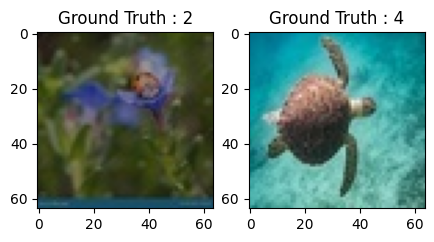

In [22]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [23]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Hacemos el One-hot Encoding para la red

In [24]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [25]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [26]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(69593, 64, 64, 3) (17399, 64, 64, 3) (69593, 5) (17399, 5)


# Creamos el modelo de CNN

In [27]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-2 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 100 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [28]:
sport_model = Sequential()
# Bloque 1
sport_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(64,64,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(BatchNormalization())
sport_model.add(MaxPooling2D(pool_size=(2, 2)))
sport_model.add(Dropout(0.25))

# Bloque 2
sport_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(BatchNormalization())
sport_model.add(MaxPooling2D(pool_size=(2, 2)))
sport_model.add(Dropout(0.25))

# Bloque 3
sport_model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(BatchNormalization())
sport_model.add(MaxPooling2D(pool_size=(2, 2)))
sport_model.add(Dropout(0.4))

# Clasificación final
sport_model.add(Flatten())
sport_model.add(Dense(64, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

C:\Users\chuy-\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\chuy-\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [29]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 618,821 (2.36 MB)

 Trainable params: 618,373 (2.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [30]:
sport_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adagrad(learning_rate=INIT_LR),
    metrics=['accuracy']
)


# Entrenamos el modelo: Aprende a clasificar imágenes

In [31]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
early_stop=EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)
checkpoint= ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label), 
                             callbacks=[early_stop, reduce_lr, checkpoint])

Epoch 1/100
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4976 - loss: 1.3292
Epoch 1: val_loss improved from None to 0.78091, saving model to best_model.keras
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 165s 150ms/step - accuracy: 0.5637 - loss: 1.1077 - val_accuracy: 0.7030 - val_loss: 0.7809 - learning_rate: 0.0100
Epoch 2/100
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.6509 - loss: 0.8881
Epoch 2: val_loss improved from 0.78091 to 0.74798, saving model to best_model.keras
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 169s 156ms/step - accuracy: 0.6627 - loss: 0.8622 - val_accuracy: 0.7085 - val_loss: 0.7480 - learning_rate: 0.0100
Epoch 3/100
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.6934 - loss: 0.7906
Epoch 3: val_loss improved from 0.74798 to 0.67517, saving model to best_model.keras
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 194s 179ms/step - accuracy: 0.7019 - loss: 0.7724 - val_accuracy: 0.7357 - val_loss: 0.6752 - learning_rate: 0.0100
Epoch 4/100
1088/1088 ━━━━━━━━━━━━

In [78]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("animals_mnist_4capas_40epochs_64x64.keras")


# Evaluamos la red

In [32]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

680/680 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9023 - loss: 0.2715


In [33]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2715069651603699
Test accuracy: 0.902289867401123


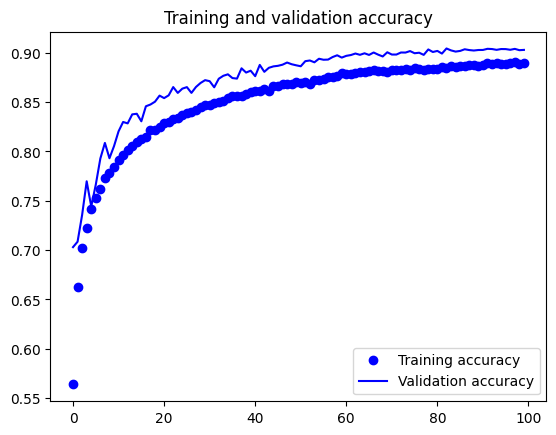

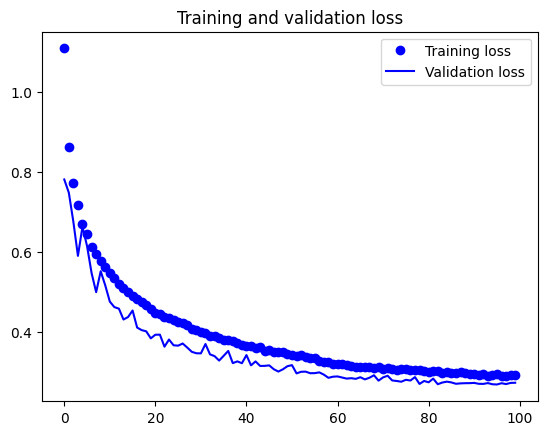

In [34]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
predicted_classes2 = sport_model.predict(test_X)

680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step


In [36]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [37]:
predicted_classes.shape, test_Y.shape

((21748,), (21748,))

# Aprendamos de los errores: Qué mejorar

Found 19623 correct labels


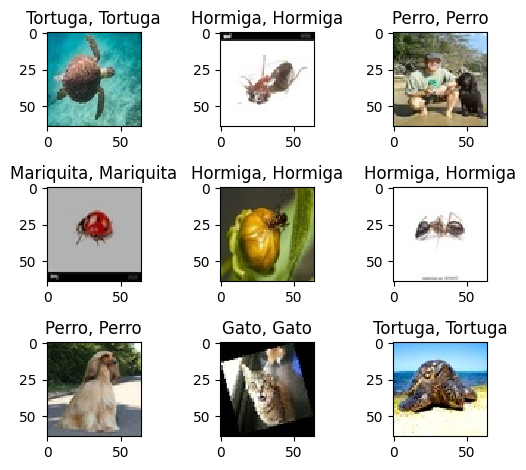

In [38]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(64,64,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 2125 incorrect labels


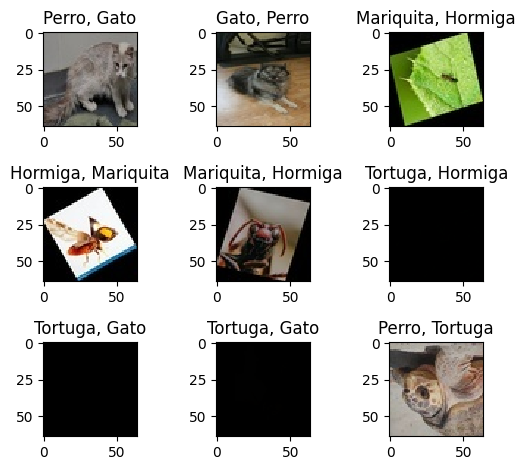

In [39]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(64,64,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [40]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.85      0.88      4296
     Class 1       0.90      0.88      0.89      4598
     Class 2       0.93      0.90      0.92      4491
     Class 3       0.89      0.92      0.90      4102
     Class 4       0.88      0.96      0.92      4261

    accuracy                           0.90     21748
   macro avg       0.90      0.90      0.90     21748
weighted avg       0.90      0.90      0.90     21748



# Prediccion de una nueva imagen

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.models import load_model

sport_model = load_model("animales_mnist_retrain.keras")

deportes = ['Gato', 'Hormiga', 'Mariquita', 'Perro', 'Tortuga']  

# Lista de imágenes a probar
filenames = ['tests/mbape.jpg']

images = []

for filepath in filenames:
    image = plt.imread(filepath)
    
    image_resized = resize(
        image, (64, 64), 
        anti_aliasing=True,
        clip=False,
        preserve_range=True
    )
    
    if len(image_resized.shape) == 2:
        image_resized = np.stack((image_resized,)*3, axis=-1)
    
    images.append(image_resized)

X = np.array(images, dtype=np.uint8)

test_X = X.astype('float32') / 255.0

print("Forma de test_X:", test_X.shape)

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    predicted_index = np.argmax(img_tagged)
    print(f"{filenames[i]} -> {deportes[predicted_index]}")


Forma de test_X: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
tests/mbape.jpg -> Gato


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.models import load_model
import os
from pathlib import Path

# Cargar el modelo
sport_model = load_model("modelo_animales.keras")
deportes = ['Gato', 'Hormiga', 'Mariquita', 'Perro', 'Tortuga']

# Especificar la carpeta con las imágenes
carpeta_imagenes = 'tests'

# Obtener todas las imágenes de la carpeta
extensiones_validas = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif')
filenames = []

for archivo in os.listdir(carpeta_imagenes):
    if archivo.lower().endswith(extensiones_validas):
        filenames.append(os.path.join(carpeta_imagenes, archivo))

# Verificar si se encontraron imágenes
if not filenames:
    print(f"No se encontraron imágenes en la carpeta '{carpeta_imagenes}'")
else:
    print(f"Se encontraron {len(filenames)} imágenes para procesar\n")
    
    images = []
    for filepath in filenames:
        try:
            image = plt.imread(filepath)
            
            image_resized = resize(
                image, (224, 224), 
                anti_aliasing=True,
                clip=False,
                preserve_range=True
            )
            
            # Convertir imagen en escala de grises a RGB si es necesario
            if len(image_resized.shape) == 2:
                image_resized = np.stack((image_resized,)*3, axis=-1)
            
            images.append(image_resized)
        except Exception as e:
            print(f"Error al procesar {filepath}: {e}")
            filenames.remove(filepath)
    
    # Procesar solo si hay imágenes válidas
    if images:
        X = np.array(images, dtype=np.uint8)
        test_X = X.astype('float32') / 255.0
        print("Forma de test_X:", test_X.shape)
        print("\nResultados de la clasificación:")
        print("-" * 50)
        
        predicted_classes = sport_model.predict(test_X)
        
        for i, img_tagged in enumerate(predicted_classes):
            predicted_index = np.argmax(img_tagged)
            confianza = img_tagged[predicted_index] * 100
            nombre_archivo = os.path.basename(filenames[i])
            print(f"{nombre_archivo:30} -> {deportes[predicted_index]:10} ({confianza:.2f}%)")
    else:
        print("No se pudieron procesar imágenes válidas")

Se encontraron 25 imágenes para procesar

Forma de test_X: (25, 224, 224, 3)

Resultados de la clasificación:
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step
gato1.jpg                      -> Perro      (83.80%)
gato2.jpg                      -> Perro      (39.40%)
gato3.jpg                      -> Perro      (38.08%)
hormiga1.jpg                   -> Gato       (73.96%)
hormiga2.jpeg                  -> Gato       (94.29%)
hormiga3.jpg                   -> Gato       (47.90%)
Hormiga4.jpg                   -> Gato       (72.04%)
mariquita1.jpg                 -> Perro      (100.00%)
mariquita2.jpg                 -> Perro      (92.06%)
mariquita3.jpg                 -> Perro      (99.83%)
mariquita4.jpg                 -> Perro      (100.00%)
mariquita5.jpg                 -> Perro      (99.97%)
mbape.jpg                      -> Mariquita  (45.11%)
perro1.jpg                     -> Mariquita  (95.38%)
perro2.jpg                     -> Perro   